In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [6]:
df = pd.read_csv('sample_data/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df = df.drop(columns='Id')

In [8]:
category = pd.get_dummies(df.Species)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [9]:
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False,False,True
146,6.3,2.5,5.0,1.9,False,False,True
147,6.5,3.0,5.2,2.0,False,False,True
148,6.2,3.4,5.4,2.3,False,False,True


In [10]:
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., True, False, False],
       [4.9, 3.0, 1.4, ..., True, False, False],
       [4.7, 3.2, 1.3, ..., True, False, False],
       ...,
       [6.5, 3.0, 5.2, ..., False, False, True],
       [6.2, 3.4, 5.4, ..., False, False, True],
       [5.9, 3.0, 5.1, ..., False, False, True]], dtype=object)

In [11]:
X = dataset[:,0:4]
y = dataset[:,4:7]

In [12]:
# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

In [34]:
Y_train = Y_train.astype(float)
Y_test = Y_train.astype(float)

In [35]:
model = Sequential([
                    Dense(64, activation='relu', input_shape=(4,)),
                    Dense(64, activation='relu'),
                    Dense(3, activation='softmax'),])

In [36]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
hist = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 5ms/step - loss: 1.0563 - accuracy: 0.6857
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0095 - accuracy: 0.6952
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9674 - accuracy: 0.6952
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9279 - accuracy: 0.6952
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8889 - accuracy: 0.6952
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8499 - accuracy: 0.6952
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8106 - accuracy: 0.6952
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7706 - accuracy: 0.6952
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7318 - accuracy: 0.6952
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.6952
Epoch 11/100
4/4 [===========

In [39]:
import matplotlib.pyplot as plt

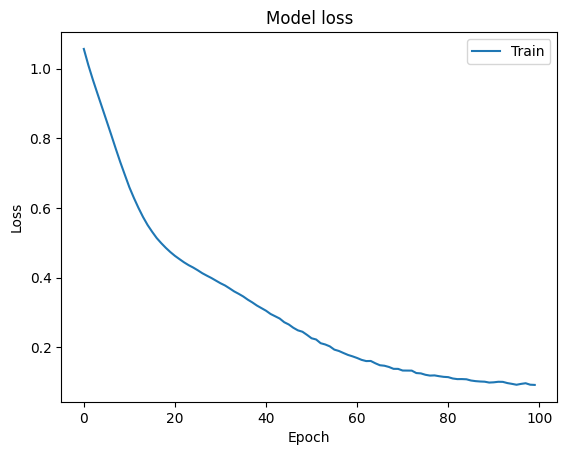

In [40]:
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

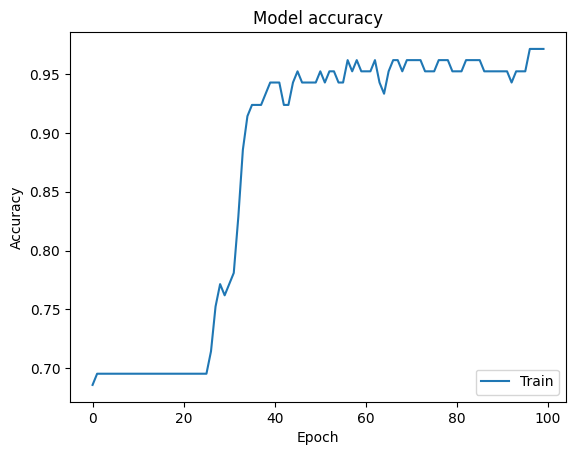

In [41]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()